In [1]:
# Import library

import numpy as np

In [2]:
# Define the sigmoid function

def sigmoid(sum_func):
  return 1 / (1 + np.exp(-sum_func))

In [3]:
sigmoid(0)

# 0.5

0.5

In [4]:
np.exp(2)

# 7.38905609893065

7.38905609893065

In [6]:
np.exp(1)

# 2.718281828459045

2.718281828459045

In [7]:
sigmoid(40)

# 1.0

1.0

In [9]:
sigmoid(-20.5)

# 1.2501528648238605e-09

1.2501528648238605e-09

In [10]:
# Define "Inputs, outputs and weights" as Numpy arrays

# Inputs

inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

In [12]:
inputs.shape

# (4, 2)

(4, 2)

In [13]:
# Outputs

outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

In [15]:
outputs.shape

# (4, 1)

(4, 1)

In [16]:
# Weights

# First row holds the weights for x1, 2nd row contains the weights for x2

weights_0 = np.array([[-0.424, -0.740, -0.961],
                     [0.358, -0.577, -0.469]])
weights_0.shape

# (2, 3)

(2, 3)

In [17]:
weights_1 = np.array([[-0.017],
                     [-0.893],
                     [0.148]])
weights_1.shape

# (3, 1)

(3, 1)

In [18]:
# Epochs & Learning Rate

epochs = 100
learning_rate = 0.3

In [19]:
input_layer = inputs
input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [20]:
# "sum_synapse_0" This holds the sum function total of weights for the hidden layer
# For the Output: Each row holds the sum_func for each input data  [0,0,0 -> data 0,0],[0.358, -0.577, -0.469 --> 0,1]
# The dot product does the matrix multiplication and also the sum

sum_synapse_0 = np.dot(input_layer, weights_0)
sum_synapse_0

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.358, -0.577, -0.469],
       [-0.424, -0.74 , -0.961],
       [-0.066, -1.317, -1.43 ]])

In [21]:
# Computing the Sigmoid function for the Hidden layer

hidden_layer = sigmoid(sum_synapse_0)
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [22]:
weights_1

array([[-0.017],
       [-0.893],
       [ 0.148]])

In [23]:
# "sum_synapse_1" This holds the sum function total of weights for the output layer
# For the Output: Each row holds the sum_func for each input data

sum_synapse_1 = np.dot(hidden_layer, weights_1)
sum_synapse_1

array([[-0.381     ],
       [-0.27419072],
       [-0.25421887],
       [-0.16834784]])

In [24]:
output_layer = sigmoid(sum_synapse_1)
output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [25]:
error_output_layer = outputs - output_layer
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [26]:
average_error = np.mean(abs(error_output_layer))
average_error

0.49880848923713045

In [27]:
def sigmoid_derivative(sigmoid):
    return sigmoid * (1 - sigmoid)

In [28]:
# output_layer holds the results of our application of the sigmoid, computed above

output_layer

array([[0.40588573],
       [0.43187857],
       [0.43678536],
       [0.45801216]])

In [29]:
# derivative_output is our Derivative of the activation function (sigmoid) which we have on the slide
# each row is for each instance of our input dataset

derivative_output = sigmoid_derivative(output_layer)
derivative_output

array([[0.2411425 ],
       [0.24535947],
       [0.24600391],
       [0.24823702]])

In [30]:
error_output_layer

array([[-0.40588573],
       [ 0.56812143],
       [ 0.56321464],
       [-0.45801216]])

In [31]:
# Delta output
# each row is for each instance of our input dataset

delta_output = error_output_layer * derivative_output
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [32]:
delta_output

array([[-0.0978763 ],
       [ 0.13939397],
       [ 0.138553  ],
       [-0.11369557]])

In [33]:
weights_1

array([[-0.017],
       [-0.893],
       [ 0.148]])

In [34]:
delta_output_x_weight = delta_output.dot(weights_1)

ValueError: ignored

In [35]:
weights_1.shape

(3, 1)

In [36]:
weights_1T = weights_1.T
weights_1T

array([[-0.017, -0.893,  0.148]])

In [37]:
weights_1T.shape

# (1, 3)

(1, 3)

In [38]:
delta_output_x_weight = delta_output.dot(weights_1T)
delta_output_x_weight

array([[ 0.0016639 ,  0.08740354, -0.01448569],
       [-0.0023697 , -0.12447882,  0.02063031],
       [-0.0023554 , -0.12372783,  0.02050584],
       [ 0.00193282,  0.10153015, -0.01682694]])

In [39]:
hidden_layer

array([[0.5       , 0.5       , 0.5       ],
       [0.5885562 , 0.35962319, 0.38485296],
       [0.39555998, 0.32300414, 0.27667802],
       [0.48350599, 0.21131785, 0.19309868]])

In [40]:
#  Each row in the output of delta_hidden_layer is for the data input values

delta_hidden_layer = delta_output_x_weight * sigmoid_derivative(hidden_layer)
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [41]:
hidden_layerT = hidden_layer.T
hidden_layerT

array([[0.5       , 0.5885562 , 0.39555998, 0.48350599],
       [0.5       , 0.35962319, 0.32300414, 0.21131785],
       [0.5       , 0.38485296, 0.27667802, 0.19309868]])

In [42]:
input_x_delta1 = hidden_layerT.dot(delta_output)
input_x_delta1

array([[0.03293657],
       [0.02191844],
       [0.02108814]])

In [43]:
# update the "weights_1"

weights_1 = weights_1 + (input_x_delta1 * learning_rate)
weights_1

array([[-0.00711903],
       [-0.88642447],
       [ 0.15432644]])

In [44]:
# First column is X1, and 2nd column is X2 (our input values )

input_layer

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [45]:
delta_hidden_layer

array([[ 0.00041597,  0.02185088, -0.00362142],
       [-0.00057384, -0.02866677,  0.00488404],
       [-0.00056316, -0.02705587,  0.00410378],
       [ 0.00048268,  0.01692128, -0.00262183]])

In [46]:
# we need to transpose the values just as we did before

input_layerT = input_layer.T
input_layerT

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [47]:
input_x_delta0 = input_layerT.dot(delta_hidden_layer)
input_x_delta0

array([[-8.04778516e-05, -1.01345901e-02,  1.48194623e-03],
       [-9.11603819e-05, -1.17454886e-02,  2.26221011e-03]])

In [48]:
weights_0 = weights_0 + (input_x_delta0 * learning_rate)
weights_0

array([[-0.42402414, -0.74304038, -0.96055542],
       [ 0.35797265, -0.58052365, -0.46832134]])

In [49]:
# Complete Artificial Neural Network

#Importing Numpy
import numpy as np

# This is the sigmoid Function
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

#This is the sigmoid derivative as used before
def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

# Our input values
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
#Our output values
outputs = np.array([[0],
                    [1],
                    [1],
                    [0]])

In [50]:
# Initializing our weights with random values

weights_0 = 2 * np.random.random((2, 3)) - 1
weights_1 = 2 * np.random.random((3, 1)) - 1

In [52]:
epochs = 400000
learning_rate = 0.6
error = []

for epoch in range(epochs):
  input_layer = inputs
  sum_synapse0 = np.dot(input_layer, weights_0)
  hidden_layer = sigmoid(sum_synapse0)

  sum_synapse1 = np.dot(hidden_layer, weights_1)
  output_layer = sigmoid(sum_synapse1)

  error_output_layer = outputs - output_layer
  average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
  if epoch % 100000 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
    error.append(average)

  derivative_output = sigmoid_derivative(output_layer)
  delta_output = error_output_layer * derivative_output

  weights1T = weights_1.T
  delta_output_weight = delta_output.dot(weights1T)
  delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)

  hidden_layerT = hidden_layer.T
  input_x_delta1 = hidden_layerT.dot(delta_output)
  weights_1 = weights_1 + (input_x_delta1 * learning_rate)

  input_layerT = input_layer.T
  input_x_delta0 = input_layerT.dot(delta_hidden_layer)
  weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.5011231956276783
Epoch: 100001 Error: 0.011401392846567309
Epoch: 200001 Error: 0.00799573686650918
Epoch: 300001 Error: 0.006506251631291854


In [54]:
#1 million epochs with a learning rate of 0.3
1 - 0.009670967930930745

# 0.9903290320690693

0.9903290320690693

In [55]:
#after 400,000 epochs, with a learning rate of 0.6
1- 0.008192022809586367

# 0.9918079771904136

0.9918079771904136

In [57]:
# Visualize thie result

import matplotlib.pyplot as plt

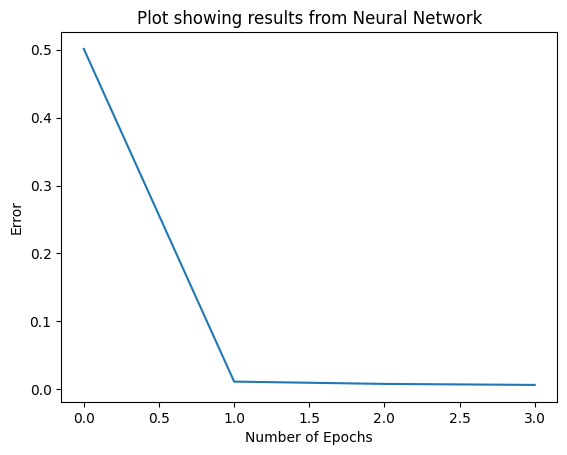

In [58]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

Plot showing results from Neural Network
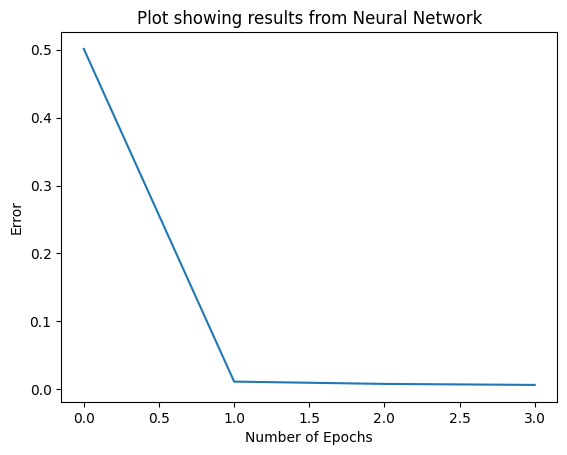

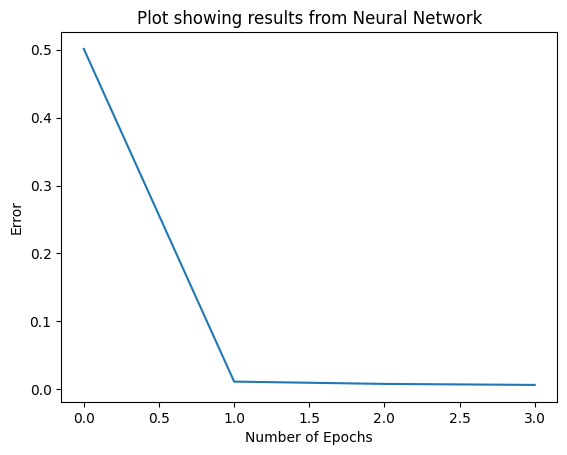

In [59]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

Plot showing results from Neural Network2

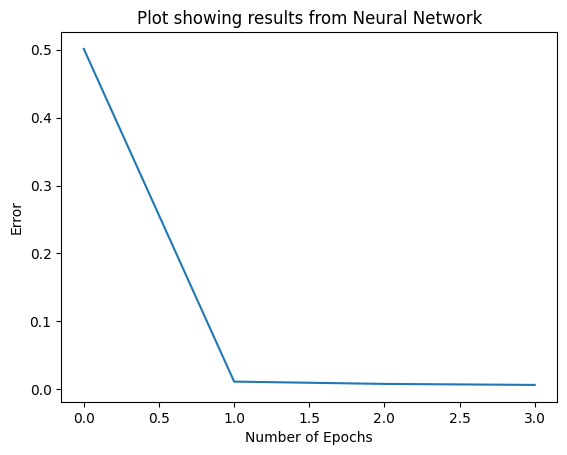